In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def actionMZ(M,z):
    num = M[0,0]*z+M[0,1]
    den = M[1,0]*z+M[1,1]
    return num/den

def rot(phi):
    return np.array([[np.exp(1j*phi/2),0],[0,np.exp(-1j*phi/2)]])

def trans(tau):
    T = np.array([[np.cosh(tau/(2*kappa)),np.sinh(tau/(2*kappa))],[np.sinh(tau/(2*kappa)),np.cosh(tau/(2*kappa))]])
    return T

def rotPointz(tau,phi0,phi):
    B = np.matmul(trans(-tau),rot(-phi0))
    B = np.matmul(rot(phi),B)
    B = np.matmul(trans(tau),B)
    B = np.matmul(rot(phi0),B)
    return B

def geodesic(z1,z2,color,style,op,circle=False):
    if (np.round(np.real(z1)*np.imag(z2)-np.real(z2)*np.imag(z1),2))!= 0:
        a = (np.imag(z1)*(np.abs(z2)**2+1)-np.imag(z2)*(np.abs(z1)**2+1))/(np.real(z1)*np.imag(z2)-np.real(z2)*np.imag(z1))
        b = (np.real(z2)*(np.abs(z1)**2+1)-np.real(z1)*(np.abs(z2)**2+1))/(np.real(z1)*np.imag(z2)-np.real(z2)*np.imag(z1))
        r = np.sqrt((a**2+b**2)/4-1)
        if -np.pi/2<np.angle(z1) and np.angle(z1)<np.pi/2:
            theta0 = np.angle(z1+a/2+1j*b/2)
            theta1 = np.angle(z2+a/2+1j*b/2)
            if theta0 < 0:
                theta0 += 2*np.pi
            if theta1 < 0:
                theta1 += 2*np.pi
        else:
            theta0 = np.angle(z1+a/2+1j*b/2)
            theta1 = np.angle(z2+a/2+1j*b/2)
        theta = np.linspace(theta0,theta1,30)
        if circle:
            theta = np.linspace(0,2*np.pi,100)
        ax = plt.gca()
        zs = r*np.cos(theta)-a/2+1j*(r*np.sin(theta)-b/2)
        for idx,l in enumerate(zs):
            zs[idx] = actionMZ(op,l)
        ax.plot(np.real(zs),np.imag(zs),style,color=color)
    else:
        ax = plt.gca()
        zs = np.linspace(np.real(z1),np.real(z2),30)+1j*np.linspace(np.imag(z1),np.imag(z2),30)
        zs = actionMZ(op,zs)
        ax.plot(np.real(zs),np.imag(zs),style,color=color)

    
rDisk = 1
kappa = 1

        
def hyperbolicDistance(z1,z2):
    d = kappa*np.arccosh(1+2*rDisk*rDisk*np.power(np.abs(z1-z2),2)/((rDisk*rDisk-np.power(np.abs(z1),2))*(rDisk*rDisk-np.power(np.abs(z2),2))))
    return d

In [3]:
#Grupo triangular de la red {p,q}

p = 3
q = 7
angleAlpha = 2*np.pi/p
angleBeta = 2*np.pi/q
r0 = rDisk*np.sqrt(np.cos(np.pi/p+np.pi/q)/np.cos(np.pi/p-np.pi/q))
hyperbolicDistancePolToOrigin = hyperbolicDistance(0,r0*np.exp(1j*2*np.pi/p))
hyperbolicDistanceNN = hyperbolicDistance(r0*np.exp(1j*2*np.pi/p),r0*np.exp(1j*4*np.pi/p))
#El grupo tiene presentación D = <x,y | x^p = y^q = (x*y)^2>

y = rot(angleBeta)
x = rotPointz(hyperbolicDistancePolToOrigin,np.pi/2,angleAlpha)

vertices = [0] + [actionMZ(x,0)]+[actionMZ(np.linalg.matrix_power(y,n),actionMZ(x,0)) for n in range(1,q)]
vertices += [actionMZ(np.linalg.matrix_power(y,n),actionMZ(x,actionMZ(y@y@y,actionMZ(x,0)))) for n in range(q)]
vertices += [actionMZ(np.linalg.matrix_power(y,4),actionMZ(np.linalg.matrix_power(x,2),vertices[14]))]
vertices += [actionMZ(np.linalg.matrix_power(y,n+1),vertices[15]) for n in range(6)]
vertices += [actionMZ(np.matmul(x,np.linalg.matrix_power(y,5)),actionMZ(np.linalg.matrix_power(x,1),vertices[8]))] 
vertices += [actionMZ(np.linalg.matrix_power(y,1),actionMZ(np.linalg.matrix_power(x,1),vertices[13]))]

#vertices += [actionMZ(np.linalg.matrix_power(y,n),actionMZ(np.linalg.matrix_power(x,m),vertices[10])) for n in range(q) for m in range(1,p)]
idx = 1

imageVertices = []
imageVertices += [actionMZ(np.linalg.matrix_power(y,12-n),actionMZ(np.linalg.matrix_power(x,2),vertices[10])) for n in range(7)]

for n in range(q):
    for m in range(1,p):
        print(idx,n,m)
        idx += 1

1 0 1
2 0 2
3 1 1
4 1 2
5 2 1
6 2 2
7 3 1
8 3 2
9 4 1
10 4 2
11 5 1
12 5 2
13 6 1
14 6 2


In [4]:
#Red de Bravais

pb = 14
qb = 7
angleAlphaB = 2*np.pi/pb
angleBetaB = 2*np.pi/qb
r0B = np.sqrt(np.cos(np.pi/pb+np.pi/qb)/np.cos(np.pi/pb-np.pi/qb))*rDisk
sigma = np.sqrt((np.cos(angleAlphaB)+np.cos(angleBetaB))/(1+np.cos(angleBetaB)))
sigmasqrt = 1/(np.sqrt(1-sigma*sigma))
polBravais = [r0B*np.exp(1j*(np.pi/pb+angleAlphaB*n)) for n in range(pb)]

## Matrices de rotación

## Matrices de traslacion
    
def gammaMu(mu):
    gamma1 = sigmasqrt*np.array([[1,sigma],[sigma,1]])
    gamma1 = np.matmul(np.matmul(rot((mu-1)*angleAlphaB),gamma1),rot(-(mu-1)*angleAlphaB))
    return gamma1

x = [gammaMu(mu) for mu in range(1,pb+1)]

In [5]:
def translation(z0):
    zn = (1/(1-np.abs(z0)**2))*np.array([[1,z0],[np.conjugate(z0),1]])
    return zn

def endPointsGeodesic(z1,z2):
    a = (np.imag(z1)*(np.abs(z2)**2+1)-np.imag(z2)*(np.abs(z1)**2+1))/(np.real(z1)*np.imag(z2)-np.real(z2)*np.imag(z1))
    b = (np.real(z2)*(np.abs(z1)**2+1)-np.real(z1)*(np.abs(z2)**2+1))/(np.real(z1)*np.imag(z2)-np.real(z2)*np.imag(z1))
    if a==0:
        y0 = -2/a
        x01 = np.sqrt(1-4/a**2)
        x02 = -np.sqrt(1-4/a**2)
        return (x01+1j*y0,x02+y0*1j)
    elif b == 0:
        x0 = -2/b
        y01 = np.sqrt(1-4/b**2)
        y02 = -np.sqrt(1-4/b**2)
        return (x0+1j*y01,x0+1j*y02)
    else:
        x0 = (4*a+np.sqrt(16*a*a-4*(a*a+b*b)*(4-b*b)))/(2*b*b)
        y0 = a*x0/b-2/b
        x01 = (4*a-np.sqrt(16*a*a-4*(a*a+b*b)*(4-b*b)))/(2*b*b)
        y01 = a*x01/b-2/b
        return (x0+y0*1j,x01+y01*1j)
    
def mobius3points(z0,z1,z2,w0,w1,w2):
    A = np.array([[z0*(z1-z2)/(z1-z0),z1*(z2-z0)/(z1-z0)],[(z1-z2)/(z1-z0),(z2-z0)/(z1-z0)]])
    B = np.array([[w0*(w1-w2)/(w1-w0),w1*(w2-w0)/(w1-w0)],[(w1-w2)/(w1-w0),(w2-w0)/(w1-w0)]])
    C = np.matmul(B,np.linalg.inv(A))
    return C

def transAlongGeodesic(z,w):
    h = translation(z)
    hinv = np.linalg.inv(h)
    beta = actionMZ(hinv,w)
    hgh = h@translation(beta)@hinv
    return hgh

In [26]:
### Vecinos celda unidad
vecinos = [[[] for x in range(31)] for n in range(24)]

#Unit cell
vecinos[0][0] += [1,2,3,4,5,6,7] #0
vecinos[1][0] += [0,7,2,8,9,16] #1
vecinos[2][0] += [0,1,3,9,10,17] #2
vecinos[3][0] += [0,2,4,10,11,18] #3
vecinos[4][0] += [0,3,5,11,12,19] #4
vecinos[5][0] += [0,4,6,12,13,20] #5
vecinos[6][0] += [0,5,7,13,14,21] #6
vecinos[7][0] += [0,6,1,14,8,15] #7
vecinos[8][0] += [1,7,16] #8
vecinos[9][0] += [2,1,17,22] #9
vecinos[10][0] += [3,2,18] #10
vecinos[11][0] += [4,3,19] #11
vecinos[12][0] += [5,4,20] #12
vecinos[13][0] += [6,5,21] #13
vecinos[14][0] += [7,6,15] #14
vecinos[15][0] += [7,14] #15
vecinos[16][0] += [1,8] #16
vecinos[17][0] += [2,9,23] #17
vecinos[18][0] += [3,10] #18
vecinos[19][0] += [4,11] #19
vecinos[20][0] += [5,12] #20
vecinos[21][0] += [6,13] #21
vecinos[22][0] += [9] #22
vecinos[23][0] += [17] #23

#Direccion gamma_1
vecinos[17][1] += [21,6,14]
vecinos[22][1] += [14]
vecinos[9][1] += [14]
vecinos[23][1] += [21]

#Direccion gamma_2
vecinos[16][2] += [20,5,13]
vecinos[8][2] += [13]

#Direccion gamma_3
vecinos[15][3] += [19,4,12]
vecinos[14][3] += [12]

#Direccion gamma_4
vecinos[21][4] += [18,3,11]
vecinos[13][4] += [11]

#Direccion gamma_5
vecinos[20][5] += [17,2,10,23]
vecinos[12][5] += [10]

#Direccion gamma_6
vecinos[19][6] += [16,1,9]
vecinos[11][6] += [9,22]

#Direccion gamma_7
vecinos[18][7] += [15,7,8]
vecinos[10][7] += [8]

#Direccion gamma_1^-1
vecinos[14][8] += [9,22,17]
vecinos[21][8] += [23,17]
vecinos[6][8] += [17]

#Direccion gamma_2^-1
vecinos[20][9] += [16]
vecinos[13][9] += [16,8]
vecinos[5][9] += [16]

#Direccion gamma_3^-1
vecinos[12][10] += [15,14]
vecinos[19][10] += [15]
vecinos[4][10] += [15]

#Direccion gamma_4^-1
vecinos[11][11] += [13,21]
vecinos[3][11] += [21]
vecinos[18][11] += [21]

#Direccion gamma_5^-1
vecinos[10][12] += [20,12]
vecinos[23][12] += [20]
vecinos[17][12] += [20]
vecinos[2][12] += [20]

#Direccion gamma_6^-1
vecinos[22][13] += [11]
vecinos[9][13] += [19,11]
vecinos[16][13] += [19]
vecinos[1][13] += [19]

#Direccion gamma_7^-1
vecinos[8][14] += [10,18]
vecinos[15][14]+= [18]
vecinos[7][14] += [18]

#Direccion gamma_2 gamma_5
vecinos[16][15] += [23]

#Direccion gamma_4 gamma_6
vecinos[13][16] += [22]

#Direccion gamma_1 gamma_3
vecinos[22][17] += [12]

#Direccion gamma_1gamma_4
vecinos[23][18] += [18]

#Direccion gamma_5^-1 gamma_2^-1
vecinos[23][19] += [16]

#Direccion gamma_6^-1 gamma_4^-1
vecinos[22][20] += [13]

#Direccion gamma_3^-1 gamma_1^-1
vecinos[12][21] += [22]

#Direccion gamma_4^-1 gamma_1^-1
vecinos[18][22] += [23]

#Direccion gamma_2 gamma_4 gamma_6
vecinos[8][23] += [22]

#Direccion gamma_1 gamma_4 gamma_7
vecinos[23][24] += [15]

#Direccion gamma_1 gamma_3 gamma_5
vecinos[22][25] += [10]

#Direcciones gammas_6 gammas_2 gamma_5
vecinos[19][26] += [23]

#Direccion gamma_6^-1 gamma_4^-1 gamma_2^-1
vecinos[22][27] += [8]

#Direccion gamma_7^-1 gamma_4^-1 gamma_1^-1
vecinos[15][28] += [23]

#Direccion gamma_5^-1 gamma_3^-1 gamma_1^-1
vecinos[10][29] += [22]

#Direccion gamma_5^-1 gamma_2^-1 gamma_6^-1
vecinos[23][30] += [19]

#Direccion
for n in range(24):
    print(n)
    for i in range(31):
        if vecinos[n][i]:
            print(vecinos[n][i])

0
[1, 2, 3, 4, 5, 6, 7]
1
[0, 7, 2, 8, 9, 16]
[19]
2
[0, 1, 3, 9, 10, 17]
[20]
3
[0, 2, 4, 10, 11, 18]
[21]
4
[0, 3, 5, 11, 12, 19]
[15]
5
[0, 4, 6, 12, 13, 20]
[16]
6
[0, 5, 7, 13, 14, 21]
[17]
7
[0, 6, 1, 14, 8, 15]
[18]
8
[1, 7, 16]
[13]
[10, 18]
[22]
9
[2, 1, 17, 22]
[14]
[19, 11]
10
[3, 2, 18]
[8]
[20, 12]
[22]
11
[4, 3, 19]
[9, 22]
[13, 21]
12
[5, 4, 20]
[10]
[15, 14]
[22]
13
[6, 5, 21]
[11]
[16, 8]
[22]
14
[7, 6, 15]
[12]
[9, 22, 17]
15
[7, 14]
[19, 4, 12]
[18]
[23]
16
[1, 8]
[20, 5, 13]
[19]
[23]
17
[2, 9, 23]
[21, 6, 14]
[20]
18
[3, 10]
[15, 7, 8]
[21]
[23]
19
[4, 11]
[16, 1, 9]
[15]
[23]
20
[5, 12]
[17, 2, 10, 23]
[16]
21
[6, 13]
[18, 3, 11]
[23, 17]
22
[9]
[14]
[11]
[12]
[13]
[10]
[8]
23
[17]
[21]
[20]
[18]
[16]
[15]
[19]


[]

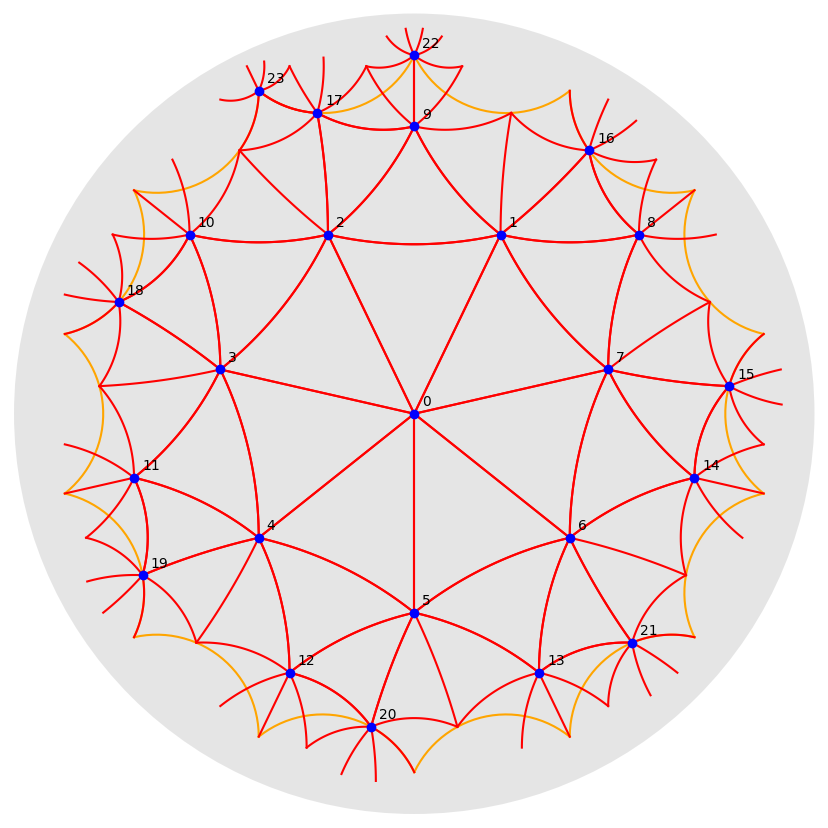

In [34]:

identity = np.array([[1,0],[0,1]])

fig , ax = plt.subplots()
m = ["a","^","x"]
circ = plt.Circle( (0, 0 ),rDisk ,fill = True, facecolor = 'grey', alpha=.2 )
ax.add_artist(circ)

gammas = []
#colores = ['blue','red']
#A = np.loadtxt("../Documentos/Programs/MonteCarloHyperbolic/DataHyperbolic/Red4ClustersField10.csv")
#print(len(A))

a = np.tanh(np.arctanh(np.cos(np.pi/pb)*np.tanh(2*np.arctanh(r0B)))*0.5)
gammas.append(mobius3points(polBravais[12],polBravais[13],imageVertices[0],polBravais[4],polBravais[3],vertices[17]))
gammas.append(mobius3points(polBravais[10],polBravais[11],imageVertices[1],polBravais[2],polBravais[1],vertices[16]))
gammas.append(mobius3points(polBravais[8],polBravais[9],imageVertices[2],polBravais[0],polBravais[13],vertices[15]))
gammas.append(mobius3points(polBravais[7],polBravais[6],imageVertices[3],polBravais[11],polBravais[12],vertices[21]))
gammas.append(mobius3points(polBravais[4],polBravais[5],imageVertices[4],polBravais[10],polBravais[9],vertices[20]))
gammas.append(mobius3points(polBravais[3],polBravais[2],imageVertices[5],polBravais[7],polBravais[8],vertices[19]))
gammas.append(mobius3points(polBravais[0],polBravais[1],imageVertices[6],polBravais[6],polBravais[5],vertices[18]))

for idx,g in enumerate(gammas[:7]):
    gammas.append(np.linalg.inv(g))

gammas2 = [identity]+gammas

direcciones = gammas2 + [gammas[1]@gammas[4]] + [gammas[3]@gammas[5]] + [gammas[0]@gammas[2]] + [gammas[0]@gammas[3]]
direcciones += [gammas[11]@gammas[8]] + [gammas[12]@gammas[10]] + [gammas[9]@gammas[7]]+[gammas[10]@gammas[7]]
direcciones += [gammas[1]@gammas[3]@gammas[5]] + [gammas[0]@gammas[3]@gammas[6]] + [gammas[0]@gammas[2]@gammas[4]] + [gammas[5]@gammas[1]@gammas[4]]
direcciones += [gammas[12]@gammas[10]@gammas[8]] + [gammas[13]@gammas[10]@gammas[7]]+[gammas[11]@gammas[9]@gammas[7]] + [gammas[11]@gammas[8]@gammas[12]]

for idx,l in enumerate(vertices[0:24]):
    #z = actionMZ(gammas[0]@gammas[3],l)
    #ax.scatter(np.real(z),np.imag(z),marker='x',color='red')
    ax.scatter(np.real(l),np.imag(l),marker='o',color = 'blue',zorder=5)
    ax.text(np.real(l)+0.02,np.imag(l)+0.02,idx)
    #ax.text(np.real(z)+0.02,np.imag(z)+0.02,idx)

for l in range(pb):
    geodesic(polBravais[l],polBravais[(l+1)%pb],'orange','-',identity)

    
for direc in range(30):
    for site in range(24):
        for el in vecinos[site][direc]:
            geodesic(vertices[site],actionMZ(direcciones[direc],vertices[el]),'red','-',identity)

ax.set_aspect('equal', adjustable='box')
fig.set_size_inches(10.5, 10.5)
ax.set_xlim(-rDisk-0.01,rDisk+0.01)
ax.set_ylim(-rDisk-0.01,rDisk+0.01)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_xticks([], minor=True)

ax.set_yticks([])
ax.set_yticks([], minor=True)

In [9]:
len(vertices)

24

In [10]:
a = gammas[2]@gammas[5]@gammas[1]@gammas[4]@gammas[0]@gammas[3]@gammas[6]
print(a)
print(np.abs(actionMZ(a,0)-0),np.abs(actionMZ(a,0.1+0.2*1j)-0.1-0.2*1j))

[[-3.39843750e-01-9.40481911e-01j -4.05897538e-13+3.81028542e-13j]
 [ 1.32782674e-13-5.13367127e-13j -3.39843750e-01-9.40481911e-01j]]
5.567185653923278e-13 4.17872095155555e-13


In [2]:
import TransversalInfo15Clusters as tr
import CosetTable15Clusters as CT

In [5]:
m=15

for sgLabel in range(1,2):
    g = np.zeros(31)
    g[0:6] = tr.ga[sgLabel][0:6]
    g[6:14] = tr.ga[sgLabel][6:14]
    g[14] = CT.CT[tr.ga[sgLabel][1],tr.ga[sgLabel][4],sgLabel]
    g[15] = CT.CT[tr.ga[sgLabel][3],tr.ga[sgLabel][5],sgLabel]
    g[16] = CT.CT[tr.ga[sgLabel][0],tr.ga[sgLabel][2],sgLabel]
    g[17] = CT.CT[tr.ga[sgLabel][0],tr.ga[sgLabel][3],sgLabel]
    g[18] = CT.CT[tr.ga[sgLabel][11],tr.ga[sgLabel][8],sgLabel]
    g[19] = CT.CT[tr.ga[sgLabel][12],tr.ga[sgLabel][10],sgLabel]
    g[20] = CT.CT[tr.ga[sgLabel][9],tr.ga[sgLabel][7],sgLabel]
    g[21] = CT.CT[tr.ga[sgLabel][10],tr.ga[sgLabel][7],sgLabel]
    g[22] = CT.CT[int(CT.CT[tr.ga[sgLabel][1],tr.ga[sgLabel][3],sgLabel]),tr.ga[sgLabel][5],sgLabel]
    g[23] = CT.CT[int(CT.CT[tr.ga[sgLabel][0],tr.ga[sgLabel][3],sgLabel]),tr.ga[sgLabel][6],sgLabel]
    g[24] = CT.CT[int(CT.CT[tr.ga[sgLabel][0],tr.ga[sgLabel][2],sgLabel]),tr.ga[sgLabel][4],sgLabel]
    g[25] = CT.CT[int(CT.CT[tr.ga[sgLabel][5],tr.ga[sgLabel][1],sgLabel]),tr.ga[sgLabel][4],sgLabel]
    g[26] = CT.CT[int(CT.CT[tr.ga[sgLabel][12],tr.ga[sgLabel][10],sgLabel]),tr.ga[sgLabel][8],sgLabel]
    g[27] = CT.CT[int(CT.CT[tr.ga[sgLabel][13],tr.ga[sgLabel][10],sgLabel]),tr.ga[sgLabel][7],sgLabel]
    g[28] = CT.CT[int(CT.CT[tr.ga[sgLabel][11],tr.ga[sgLabel][9],sgLabel]),tr.ga[sgLabel][7],sgLabel]
    g[29] = CT.CT[int(CT.CT[tr.ga[sgLabel][11],tr.ga[sgLabel][8],sgLabel]),tr.ga[sgLabel][12],sgLabel]
    #24*i+j es sitio j celda i
    
    hopping = np.zeros((24*m,24*m))
    for cell in range(m):
        for site in range(24):
            for vec in vecinos[site][0]:
                hopping[cell*24+site,cell*24+vec] +=1
    
    for cell in range(m):
        for direc in range(1,31):
            neighCell = CT.CT[cell,int(g[direc-1]),sgLabel]
            for site in range(24):
                for vec in vecinos[site][direc]:
                    hopping[int(24*cell+site),int(24*neighCell+vec)] +=1


In [6]:
for n in range(24*9):
    print(np.sum(hopping[n,:]),np.sum(hopping[:,n]))
    for m in range(24*9):
        if(hopping[n,m]!= hopping[m,n]):
            print(hopping[n,m],hopping[m,n],n,m)

7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0
7.0 7.0


In [21]:
f = open("neighbours2.h", "a")
f.write("std::map<int, std::vector<int>> vecinos; \n")
m=9
nSites = 24*m
print(nSites)
for site in range(nSites):
    line = f'vecinos[{site}] = {{'
    count = 0
    for vec in range(nSites):
        if hopping[site,vec]:
            count +=1
            if count==7:
                line += f'{vec}'
            else:
                line += f'{vec},'
    line += "}; \n"
    f.write(line)
f.close()    

216


In [7]:
np.save("./hopping15",hopping)